In [1]:
import pandas as pd
import seaborn as sns
import os
import datetime as dt

In [2]:
main_path = ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/shared/homeworks/python_ds_miniprojects/4/data')


In [3]:
#прочитать все csv-файлы в директории и объединить в один ДФ

df = pd.DataFrame()                                  #создаём пустой ДФ куда будем добавлять считываемые таблицы

for address, dirs, files in os.walk(main_path):      #запись для углубления в директории 
    for name in files:
        path_1 = os.path.join(address, name)         #взяли очередной полный путь к файлу
        df_1 = pd.read_csv(path_1)                   #прочитали csv в df_sub
        
        df_1['name'] = path_1.split('/')[-2]         #разделяем путь по знаку / чтобы
                                                     #добавить столбец с именем покупателя в df_1
        
        df_1['date'] = pd.to_datetime(path_1.split('/')[-3])    #разделяем путь по знаку / чтобы
                                                                #обавить столбец с датой покупки в df_1 и
                                                                #переводим в формат даты

        df_1 = df_1.drop(columns={'Unnamed: 0'})     #удаляем лишнюю колонку
           
        df = pd.concat([df, df_1])     

In [4]:
df['quantity'].sum()

480

In [5]:
#кол-во покупок по клинету

purchases_by_client = df.groupby(by='name', as_index=False) \
                        .agg({'quantity': 'sum'}) \
                        .sort_values(by='quantity', ascending=False)
purchases_by_client.head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


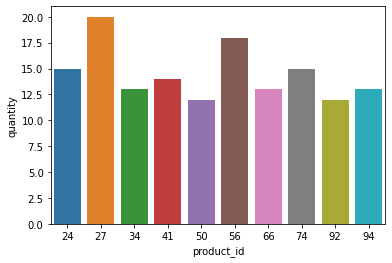

In [6]:
#кол-во покупок по товару

purchases_by_product = df.groupby(by='product_id', as_index=False) \
                        .agg({'quantity': 'sum'}) \
                        .sort_values(by='quantity', ascending=False)

sns.barplot(x='product_id', y='quantity', data=purchases_by_product.head(10))
purchases_by_product

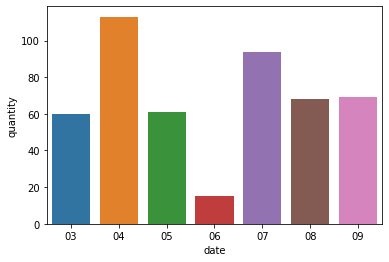

In [7]:
#кол-во покупок по дням

purchases_by_day = df.groupby(by='date', as_index=False) \
                        .agg({'quantity': 'sum'}) \
                        .sort_values(by='date', ascending=True)
purchases_by_day['date'] = purchases_by_day['date'].dt.strftime('%d')
sns.barplot(x='date', y='quantity', data=purchases_by_day)

In [8]:
#кол-во клиентов с повторными покупками (в разные дни)

df_clean = df.drop_duplicates(subset=['name', 'product_id', 'date' ]) #убираем дубли на случай покупок товара несколько раз
                                                                      #за день одним клиентом не

df_clean = df_clean.groupby(by=['name', 'product_id'], as_index=False) \
            .agg({'product_id': 'count'}) \
            .sort_values(by='product_id', ascending=False)
df_clean

,name,product_id
37,Anton_Ivanov,2
92,Petr_Fedorov,2
0,Alexey_Fedorov,1
109,Petr_Smirnov,1
103,Petr_Petrov,1
...,...,...
54,Anton_Smirnov,1
55,Anton_Smirnov,1
56,Anton_Smirnov,1
57,Anton_Smirnov,1
